# Control run NAO comparison plot

We compare the NAO teleconnection patterns between ERA5 and the DestinE control run for IFS/NEMO.
Data have been obtained with the CLI available in the `cli` folder of the diagnostic.

Setup files for the CLI used to produce these data are available in the repository, in the `cli` folder.

In [15]:
import xarray as xr

from teleconnections import maps_plot

In [16]:
# Load the data
path = '/home/b/b382289/aqua_telec_output_control/NetCDF/NAO/'

models = ['IFS', 'ERA5']
exps = ['control-1950-devcon', 'era5']

## Regression plots

We compare the regression plots obtained from ERA5 and nextGEMS simulations.
Notice that we don't compare here the index values, but they're available as they were produced by the CLI.

In [17]:
# Regressions
regs = []

regs.append(xr.open_dataarray(path + 'teleconnections_IFS_control-1950-devcon_lra-r100-monthly_NAO_regression.nc'))
regs.append(xr.open_dataarray(path + 'teleconnections_ERA5_era5_monthly_NAO_regression.nc'))

# Custom titles so that different time periods can be shown

titles = ['IFS/NEMO control run (1950-01, 1960-01)',
          'ERA5 (1940-01, 2022-12)']

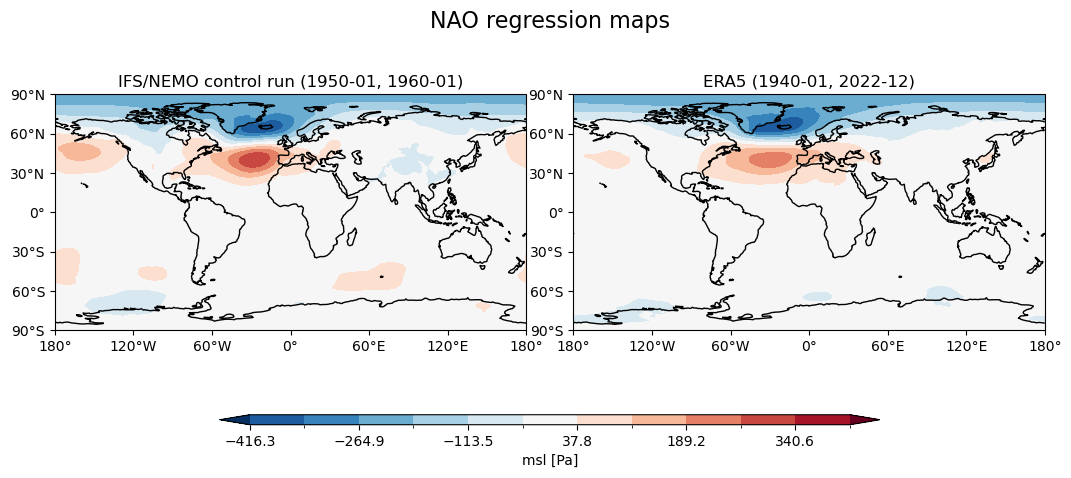

In [18]:
maps_plot(maps=regs, models=models, exps=exps, title='NAO regression maps', titles=titles, cbar_label='msl [Pa]', nlevels=12, figsize=(11,5))

## Correlation plots

We compare the correlation plots obtained from ERA5 and nextGEMS simulations, same as the regression plots.

In [19]:
# Correlations
cors = []

cors.append(xr.open_dataarray(path + 'teleconnections_IFS_control-1950-devcon_lra-r100-monthly_NAO_correlation.nc'))
cors.append(xr.open_dataarray(path + 'teleconnections_ERA5_era5_monthly_NAO_correlation.nc'))

titles = ['IFS/NEMO control run (1950-01, 1960-01)',
          'ERA5 (1940-01, 2022-12)']

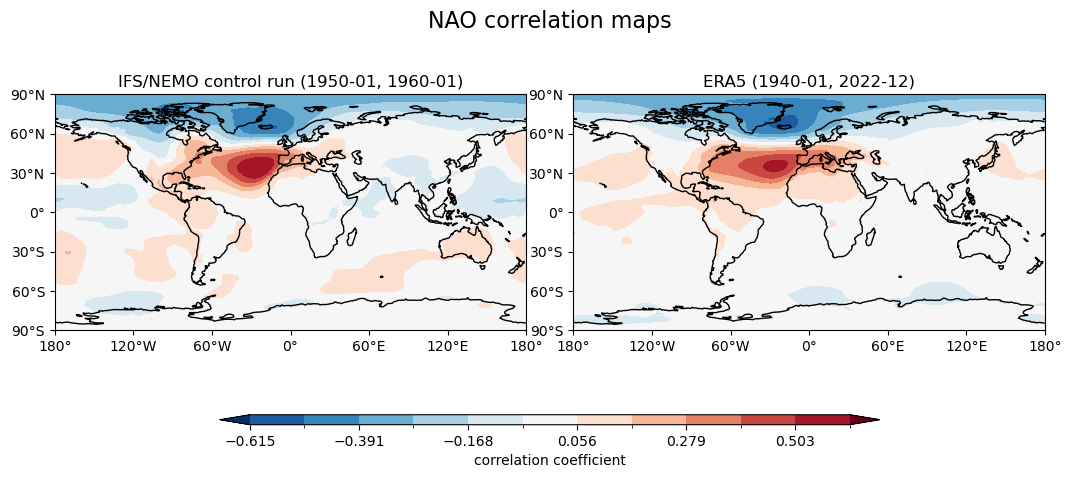

In [20]:
maps_plot(maps=cors, models=models, exps=exps, title='NAO correlation maps', titles=titles, cbar_label='correlation coefficient', nlevels=12, figsize=(11,5))

## ERA5 comparison

Finally we plot the maps obtained from the subtraction of the ERA5 regression/correlation maps from the nextGEMS regression/correlation maps.

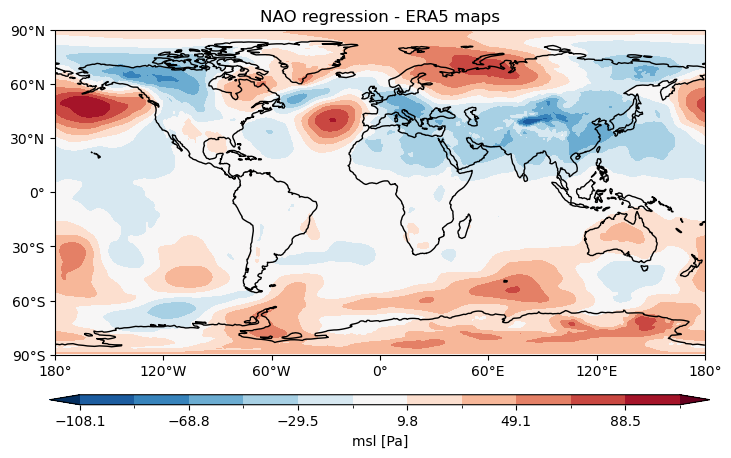

In [21]:
# Difference between experiments and ERA5 for regression
diffs_reg = []

for i in range(len(models)):
    diffs_reg.append(regs[i] - regs[-1])

titles = ['IFS/NEMO control run (1950-01, 1960-01)',
          'ERA5 (1940-01, 2022-12)']

diffs_reg.pop(-1)

from teleconnections.plots import single_map_plot

single_map_plot(map = diffs_reg[0], title='NAO regression - ERA5 maps', cbar_label='msl [Pa]', nlevels=12, figsize=(11,5))

#maps_plot(maps=diffs_reg, models=models, exps=exps, title='NAO regression - ERA5 maps', titles=titles, cbar_label='msl [Pa]', nlevels=12, figsize=(11,5))

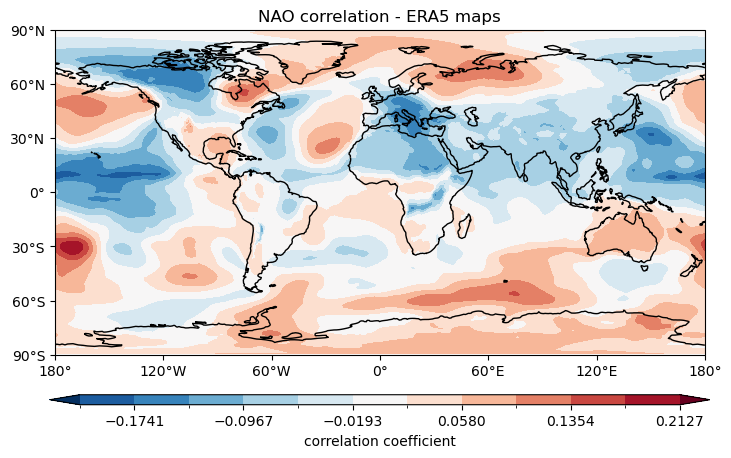

In [22]:
# Difference between experiments and ERA5 for correlation
diffs_cor = []

for i in range(len(models)):
    diffs_cor.append(cors[i] - cors[-1])

diffs_cor.pop(-1)

#maps_plot(maps=diffs_cor, models=models, exps=exps, title='NAO correlation - ERA5 maps', titles=titles, cbar_label='correlation coefficient', nlevels=12)

single_map_plot(map = diffs_cor[0], title='NAO correlation - ERA5 maps', cbar_label='correlation coefficient', nlevels=12, figsize=(11,5))

In [23]:
# We add cyclic point to the data to avoid the white line in the plot
from teleconnections.plots import add_cyclic_lon

regs[0] = add_cyclic_lon(regs[0])
diffs_reg[0] = add_cyclic_lon(diffs_reg[0])

regs[1] = add_cyclic_lon(regs[1])

2023-09-01 14:13:22 :: Multiple maps and differences :: INFO     -> Min value for the colorbar (diffs): -450
2023-09-01 14:13:22 :: Multiple maps and differences :: INFO     -> Max value for the colorbar (diffs): 450
2023-09-01 14:13:22 :: Multiple maps and differences :: INFO     -> Plotting model IFS experiment control-1950-devcon


2023-09-01 14:13:22 :: Multiple maps and differences :: INFO     -> Plotting model ERA5 experiment era5
2023-09-01 14:13:23 :: Multiple maps and differences :: WARNING  -> No diff for map 1
2023-09-01 14:13:23 :: Multiple maps and differences :: INFO     -> Saving figure to ./NAO_regression_diffs.pdf


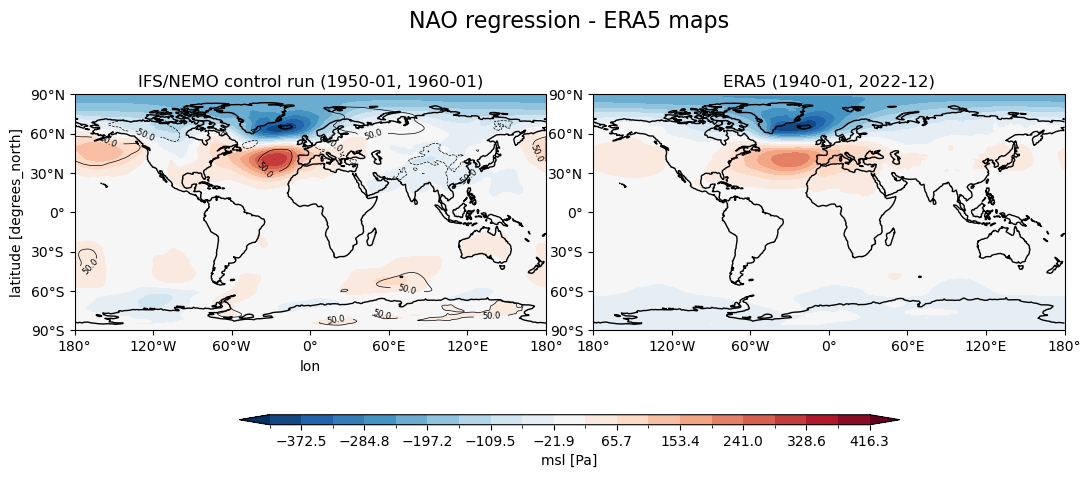

In [24]:
from teleconnections import maps_diffs_plot

maps_diffs_plot(maps=regs, diffs=diffs_reg, models=models, exps=exps, title='NAO regression - ERA5 maps', titles=titles,
                cbar_label='msl [Pa]', nlevels=20, loglevel='INFO', vmin_diff=-450, vmax_diff=450, figsize=(11,5))
# If you want to save add:
# save=True, filename='NAO_regression_diffs.pdf'